# **Creating Neural_Network from scratch**

-----------------------
## **Objective**
-----------------------

* To construct a small neural network with two layers, and observe its process of learning and prediction.

##Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Defining my neural network model

In [2]:
# Neural Network model
input_size = 2
hidden_size = 4
output_size = 1

In [3]:
print("Number of units in the input layer：{}".format(input_size))
print("Number of units in the hidden layer：{}".format(hidden_size))
print("Number of units in the output layer：{}".format(output_size))

Number of units in the input layer：2
Number of units in the hidden layer：4
Number of units in the output layer：1


##Preparing dataset

In [4]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [5]:
print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


In [6]:
print ('shape of input data X:' + str(X.shape))
print ('shape of labels y:' + str(y.shape))

shape of input data X:(4, 2)
shape of labels y:(4, 1)


In [7]:
# Defining m as the size of train data
m = X.shape[0]

##Preparing activation function

Here, I will use Sigmoid function for my neural network model. It is a function that maps input values to a value between 0 - 1, making it useful for binary classification and logistic regression problems.

Sigmoid function is defined by the formula below:

$$\sigma{(x)}=\frac{1}{1+e^{-x}}$$

In [8]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

Next, I will prepare another function, which is the Derivative of Sigmoid function and this will be used for backpropagation.

Derivative of Sigmoid function is defined by the formula below:

$$\sigma'{(x)}=\sigma{(x)}(1-\sigma{(x)})$$

In [9]:
def sigmoid_derivative(x):
    y = sigmoid(x) * (1 - sigmoid(x))
    return y

##Initializing parameters

The parameters of Weights (w) and Biases (b) will be initialized with randomly generated numbers.

**・How to initialize Weights (w)**

- np.random.uniform(low=-1, high=1, size=(a, b))
- I will use NumPy's random.uniform. The 'low' and 'high' parameters determine the range of random values generated. The shape of the array is determined by the values given to 'a' and 'b'.

**・How to initialize Biases (b)**

- np.zeros((a, b))
- I will use NumPy's np.zeros. The shape of the array is determined by the values given to 'a' and 'b'.

In [10]:
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.uniform(low=-1, high=1, size=(input_size, hidden_size))
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.uniform(low=-1, high=1, size=(hidden_size, output_size))
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

In [11]:
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

In [12]:
print("Initial value of W1\n", W1)
print("Initial value of b1\n", b1)
print("Initial value of W2\n", W2)
print("Initial value of b2\n", b2)

Initial value of W1
 [[-0.23650543  0.5555775   0.74935108  0.83710329]
 [-0.62887511  0.72153509 -0.34654959  0.90564944]]
Initial value of b1
 [[0. 0. 0. 0.]]
Initial value of W2
 [[-0.71243443]
 [ 0.49364618]
 [ 0.00728314]
 [-0.0437363 ]]
Initial value of b2
 [[0.]]


In [13]:
print("Shape of W1：" + str(W1.shape))
print("Shape of b1：" + str(b1.shape))
print("Shape of W2：" + str(W2.shape))
print("Shape of b2：" + str(b2.shape))

Shape of W1：(2, 4)
Shape of b1：(1, 4)
Shape of W2：(4, 1)
Shape of b2：(1, 1)


##Implementation of Forward Propagation

Now, I will start creating my neural network from scratch.

The first step is to implement the forward propagation, where input data is fed in the forward direction through the network.

Although I won't be building image prediction model in this notebook, here is a blueprint illustrating the training steps of my neural network.

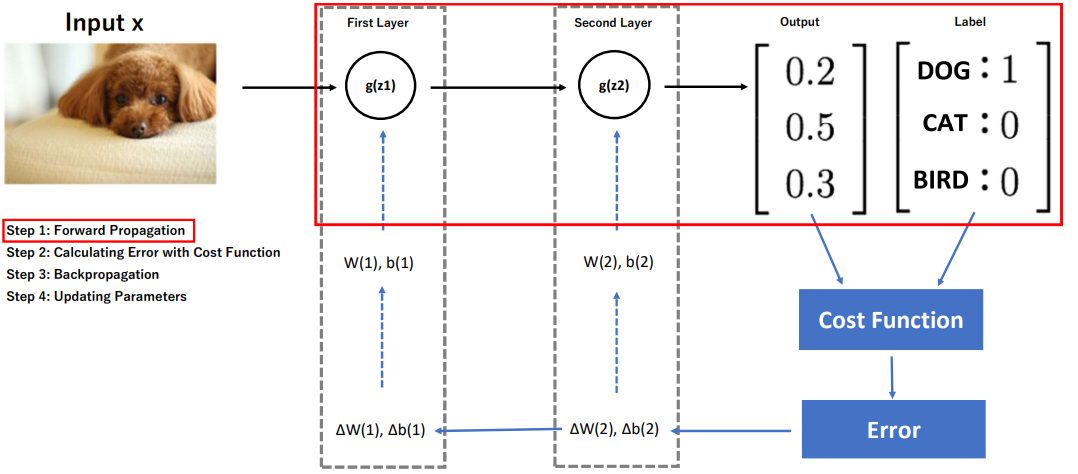

As I will use Sigmoid function, the forward propagation in my model can be defined by the formulas below:
$$z^{(1)}=W^{(1)}x^{(1)}+b^{(1)}$$
$$a^{(1)}=sigmoid(z^{(1)})$$
$$z^{(2)}=W^{(2)}a^{(1)}+b^{(2)}$$
$$a^{(2)}=sigmoid(z^{(2)})$$

In [14]:
def forward_propagation(X, W1, b1, W2, b2):
    layer1_z = np.dot(X, W1) + b1
    layer1_a = sigmoid(layer1_z)
    layer2_z = np.dot(layer1_a, W2) + b2
    layer2_a = sigmoid(layer2_z)
    return layer1_z, layer1_a, layer2_z, layer2_a

In [15]:
layer1_z, layer1_a, layer2_z, layer2_a = forward_propagation(X, W1, b1, W2, b2)

In [16]:
print("Output from the model with initial parameters: ")
print(layer2_a)

Output from the model with initial parameters: 
[[0.46813806]
 [0.51407335]
 [0.49345338]
 [0.53547026]]


##Implementation of Cost Function

For the cost function for my neural network model, I will use Binary Cross-Entropy, also known as Log Loss, which is a loss function used in machine learning for binary classification problems. It measures the performance of a classification model whose output is a probability value between 0 and 1.

The formula of Binary Cross-Entropy is defined as below:
$$C(w,b)=-\frac{1}{m}\sum_{n=1}^{m}\{y_n{\log}\hat{y}_{n}+(1-y_{n}){\log}(1-\hat{y}_n)\}$$

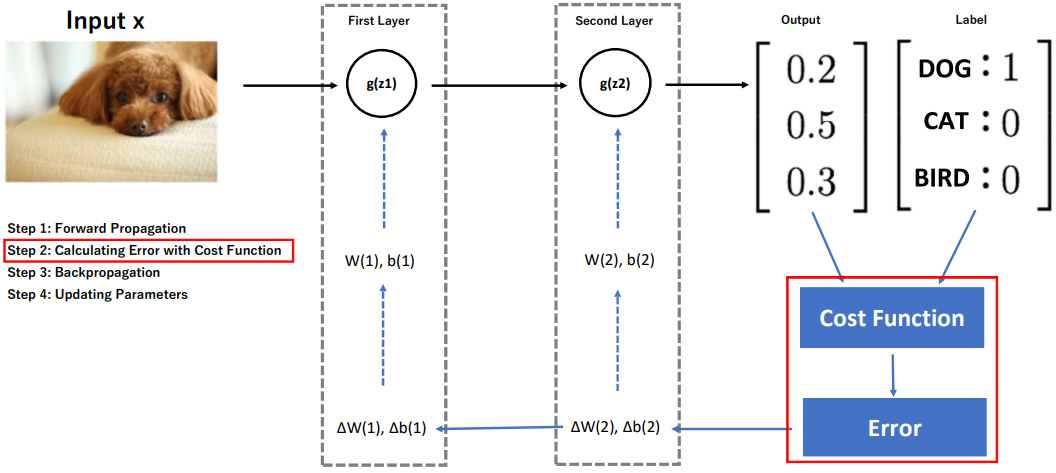

In [17]:
def compute_cost(y, y_hat, m):
    cost = -1 * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) / m
    return cost

In [18]:
cost = compute_cost(y, layer2_a, m)

In [19]:
print("calculated cost from the model with initial parameters: ", cost)

calculated cost from the model with initial parameters:  0.6924543066327808


##Implementation of Backpropagation

I will now implement the backward propagation (a.k.a. backpropagation) for my neural network model. Backpropagation calculates the gradients of the objective function with respect to the parameters, and it is the most important part of the implementation in a neural network.

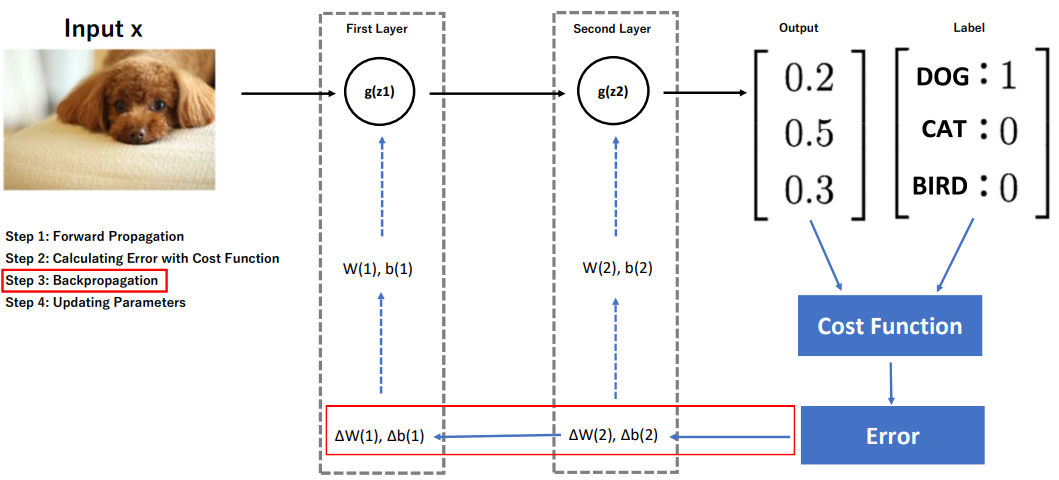

Here are the formulas for the backpropagation in my model:

$$\frac{∂C}{∂z^{(2)}}=\frac{∂C}{∂a^{(2)}}\frac{∂a^{(2)}}{∂z^{(2)}}=-\frac{1}{m}⋅\frac{y}{a^{(2)}}⋅g'(z^{(2)})=\frac{1}{m}(a^{(2)}-y)$$

$$\frac{∂C}{∂W^{(2)}}=\frac{∂C}{∂z^{(2)}}\frac{∂z^{(2)}}{∂W^{(2)}}=\frac{1}{m}(a^{(2)}-y)⋅a^{(1)}$$

$$\frac{∂C}{∂b^{(2)}}=\frac{∂C}{∂z^{(2)}}\frac{∂z^{(2)}}{∂b^{(2)}}=\frac{1}{m}(a^{(2)}-y)$$

$$\frac{∂C}{∂a^{(1)}}=\frac{∂C}{∂z^{(2)}}\frac{∂z^{(2)}}{∂a^{(1)}}=\frac{1}{m}(a^{(2)}-y)⋅W^{(2)}$$

$$\frac{∂C}{∂z^{(1)}}=\frac{∂C}{∂a^{(1)}}\frac{∂a^{(1)}}{∂z^{(1)}}=\frac{1}{m}(a^{(2)}-y)⋅W^{(2)}⋅g'(z^{(1)})$$

$$\frac{∂C}{∂W^{(1)}}=\frac{∂C}{∂z^{(1)}}\frac{∂z^{(1)}}{∂W^{(1)}}=\frac{1}{m}(a^{(2)}-y)⋅W^{(2)}⋅g'(z^{(1)})⋅X$$

$$\frac{∂C}{∂b^{(1)}}=\frac{∂C}{∂z^{(1)}}\frac{∂z^{(1)}}{∂b^{(1)}}=\frac{1}{m}(a^{(2)}-y)⋅W^{(2)}⋅g'(z^{(1)})$$

In [20]:
def back_propagation(X, y, W2, layer1_z, layer1_a, layer2_z, layer2_a):
    m = X.shape[0]
    derivative_layer2_z = (layer2_a - y) / m
    delta_W2 = np.dot(layer1_a.T, derivative_layer2_z)
    delta_b2 = np.sum(derivative_layer2_z, axis=0, keepdims=True)

    derivative_layer1_z = np.dot(derivative_layer2_z, W2.T) * sigmoid_derivative(layer1_z)
    delta_W1 = np.dot(X.T, derivative_layer1_z)
    delta_b1 = np.sum(derivative_layer1_z, axis=0, keepdims=True)
    return delta_W2, delta_b2, delta_W1, delta_b1

In [21]:
delta_W2, delta_b2, delta_W1, delta_b1 = back_propagation(X, y, W2, layer1_z, layer1_a, layer2_z, layer2_a)

##Implementation for updating parameters

Lastly, I will prepare the function to update parameters using the gradients (delta_W1, delta_b1, delta_W2, delta_b2) calculated during backpropagation.

Here is the formula for updating parameters:

$$w=w-\alpha\Delta{w}$$
$$b=b-\alpha\Delta{b}$$

NOTE: "α" means learning rate

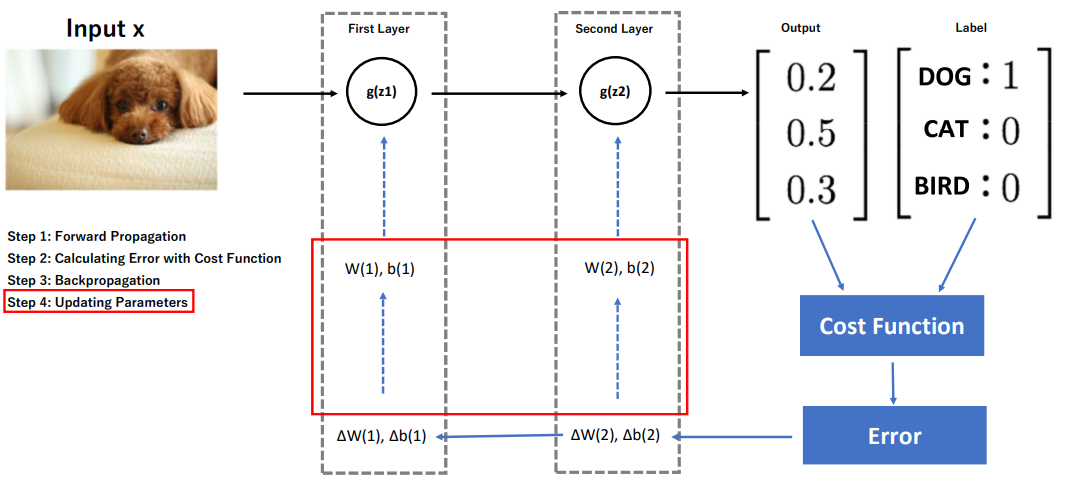

In [22]:
def update_parameters(W1, b1, W2, b2, delta_W1, delta_b1, delta_W2, delta_b2, learning_rate):
    W1 = W1 - (learning_rate * delta_W1)
    b1 = b1 - (learning_rate * delta_b1)
    W2 = W2 - (learning_rate * delta_W2)
    b2 = b2 - (learning_rate * delta_b2)
    return W1, b1, W2, b2

In [23]:
W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, delta_W1, delta_b1, delta_W2, delta_b2, learning_rate = 0.1)

##Building Neural Network model

Now that I have prepared the necessary functions of neural network model, I will finally build my classification model and see how it works.

In [24]:
def XOR_model(W1, b1, W2, b2):
    # Preparing datasets
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    y = np.array([[0], [1], [1], [0]])
    m = X.shape[0]

    # learning rate
    learning_rate = 0.2
    # epoch
    epochs =  30000

    for _ in range(epochs):

        # Forward Propagation
        # Layer1
        layer1_z = np.dot(X, W1) + b1
        layer1_a = sigmoid(layer1_z)

        # Layer2
        layer2_z = np.dot(layer1_a, W2) + b2
        layer2_a = sigmoid(layer2_z)

        # Cost Function
        cost.append(- np.sum(y * np.log(layer2_a) + (1-y) * np.log(1 - layer2_a)) / m )

        # Backpropagation
        derivative_layer2_z = (layer2_a - y) / m
        delta_W2 = np.dot(layer1_a.T, derivative_layer2_z)
        delta_b2 = np.sum(derivative_layer2_z, axis=0 ,keepdims=True)

        derivative_layer1_z = np.dot(derivative_layer2_z, W2.T) * sigmoid_derivative(layer1_z)
        delta_W1 = np.dot(X.T, derivative_layer1_z)
        delta_b1 = np.sum(derivative_layer1_z, axis=0 ,keepdims=True)

        # Updating parameters
        W2 = W2 - (learning_rate * delta_W2)
        b2 = b2 - (learning_rate * delta_b2)
        W1 = W1 - (learning_rate * delta_W1)
        b1 = b1 - (learning_rate * delta_b1)

    return layer2_a, W1, b1, W2, b2

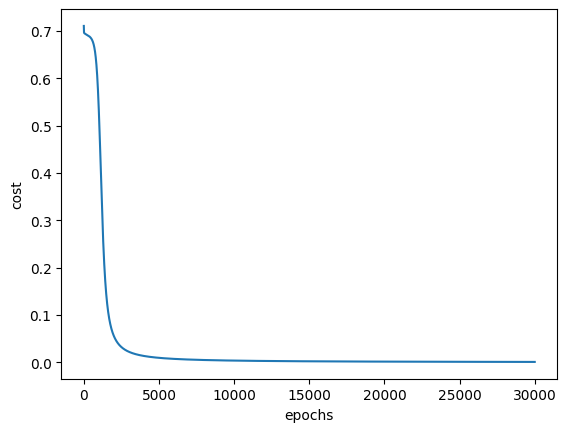

In [25]:
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size) # Initializing parameters
cost = [] # Array to store the outputs
layer2_a, W1, b1, W2, b2 = XOR_model(W1, b1, W2, b2)
plt.plot(cost) # Plotting outputs
plt.ylabel("cost")
plt.xlabel("epochs")
plt.show()

**Observations:**
- The calculated cost declines sharply after the epoch of 2,500.

In [26]:
print("Outputs from the model")
print(layer2_a)

Outputs from the model
[[3.66120411e-04]
 [9.99170613e-01]
 [9.98579860e-01]
 [1.87506532e-03]]


In [27]:
# Categorizing the outputs into 0 and 1 based on the threshold of 0.5 for easy recognition
output = np.where(layer2_a > 0.5, 1, 0)
print(output)

[[0]
 [1]
 [1]
 [0]]


**Observations:**
- The model correctly classifies the data.